In [1]:
# importing required modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Loading the data 
cdf = pd.read_csv('Company_Data.csv')

In [6]:
# lookng at the data
cdf.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
cdf.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    int32 
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
dtypes: int32(1), int64(7), object(3)
memory usage: 32.9+ KB


In [8]:
# converting sales column from string to int
cdf["Sales"]= cdf["Sales"].astype(int)

In [9]:
# labeling the data where ever required
label_encoder = preprocessing.LabelEncoder()
cdf['Urban']= label_encoder.fit_transform(cdf['Urban']) 
cdf['US']= label_encoder.fit_transform(cdf['US']) 
cdf['ShelveLoc']= label_encoder.fit_transform(cdf['ShelveLoc']) 

#### Decision Tree Regression

In [11]:
# Decision Tree Regression model importing 
from sklearn.tree import DecisionTreeRegressor

In [13]:
# assigning the data to x and y
array = cdf.values
X = array[:,1:]
y = array[:,0]

In [14]:
# Seperating data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [15]:
# creating model with mse criterion
# change in criterios has no affect on the result when tried with other
# no restriction of leaves are depth given
model = DecisionTreeRegressor(random_state = 7,criterion = "mse")
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=7)

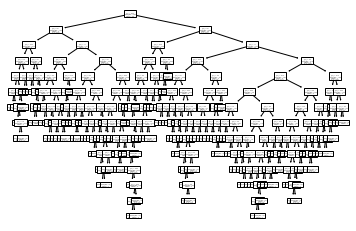

In [23]:
#PLot the decision tree
tree.plot_tree(model);

In [16]:
#Finding the accuracy of the model
model.score(X_test,y_test)

# the accuracy is very low 

0.4254740168539326

# Using Classifier 

In [18]:
# above model is using regression with sales as contineous variable
# now we try classification by labelling the sales into three categories 

In [19]:
# Creating Sales Label column with zero values
cdf['Slabel']=0

# assigning the values based on the sales figure 
cdf.loc[cdf['Sales']<=4, 'Slabel'] = 'Low'
cdf.loc[(cdf['Sales']>4) & (cdf['Sales']<8), 'Slabel'] = 'Mediam'
cdf.loc[cdf['Sales']>=8, 'Slabel'] = 'High'

In [20]:
# Looking at the data
cdf.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Slabel
0,9,138,73,11,276,120,0,42,17,1,1,High
1,11,111,48,16,260,83,1,65,10,1,1,High
2,10,113,35,10,269,80,2,59,12,1,1,High
3,7,117,100,4,466,97,2,55,14,1,1,Mediam
4,4,141,64,3,340,128,0,38,13,1,0,Low


In [21]:
# encoding  slabel from string to label 
cdf['Slabel']= label_encoder.fit_transform(cdf['Slabel']) 

In [22]:
# assigning the data to x and y variables 
# the original salescolumn is ommited 

x=cdf.iloc[:,1:11]
y=cdf['Slabel']

In [23]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=7)

### Building Decision Tree Classifier using gini Criteria

In [65]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=6)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

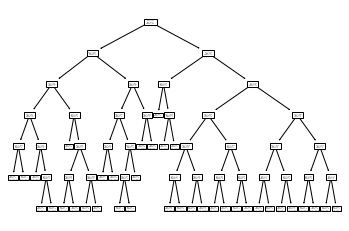

In [66]:
#PLot the decision tree
tree.plot_tree(model);


In [67]:
list(cdf.columns)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Slabel']

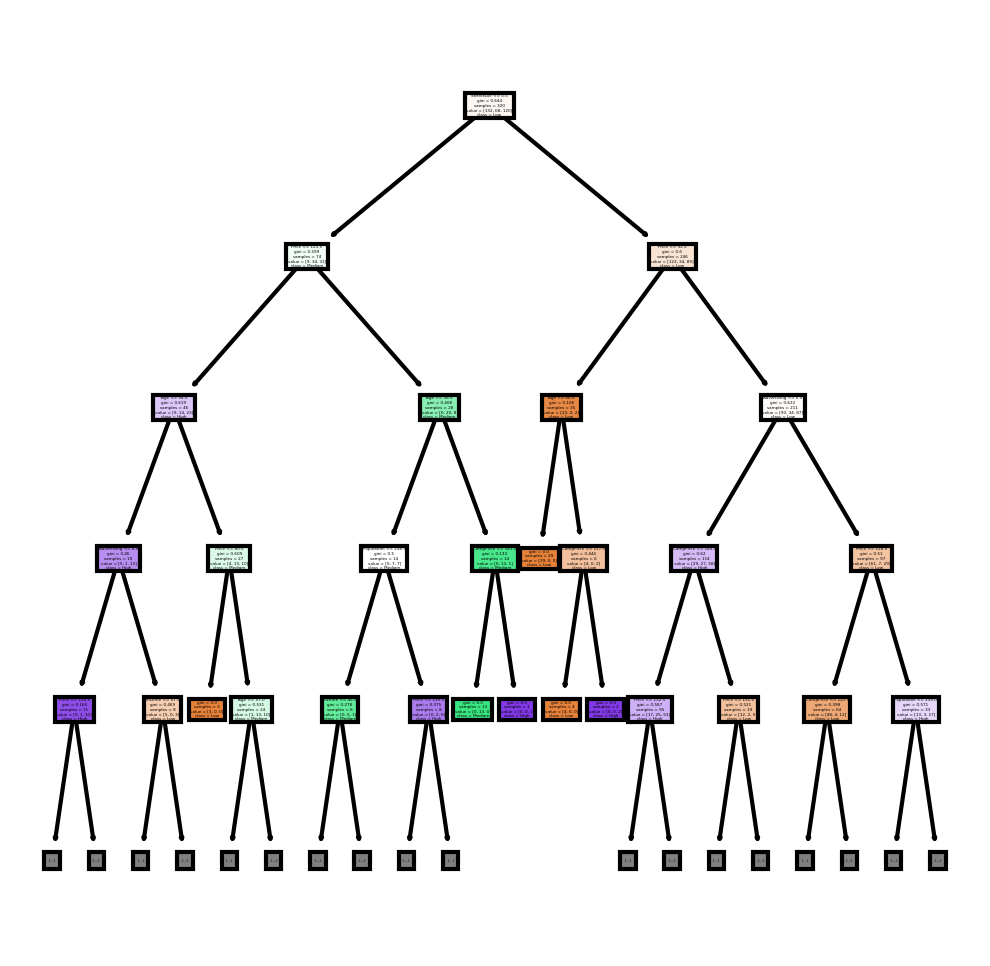

In [68]:
# plotting the decision tree 
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Slabel']
cn=['Low', 'Mediam', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True,
                max_depth = 4);

In [69]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    45
0    24
1    11
dtype: int64

In [70]:
preds

array([1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2])

In [71]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Slabel,,,
0,20,1,11
1,0,6,3
2,4,4,31


In [72]:
# Accuracy is given by 
np.mean(preds==y_test)

0.7125

In [82]:
# the accuracy is better than the regression model
# using the entropy also made no considerable change in the accuracy 
# deph of 6 is giving better accuracy than other values